## Phase estimation Algorithm

In [1]:
import qiskit
import numpy as np
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit.providers.basic_provider import BasicSimulator

In [2]:
#Quantum Fourier Transform Inverse
def QFT_I(q_circuit, n):
    #Swap of all of qubits
    for l in range(n//2):
        q_circuit.swap(l, n - 1 - l)
    q_circuit.barrier()
    
    for k in range(0, n):
        for i in range(0, k):
            q_circuit.cp(- np.pi / (2 ** (k - i)), n - k - 1, n - i - 1)
        q_circuit.h(n - k - 1)
        q_circuit.barrier()

Given an unitary operator $U$:

$$
U | \psi \rangle = e ^{2 \pi i \phi} | \psi \rangle.
$$

We want to obtain the phase ($2 \pi i \phi$).

For this, if we apply:

$$
U ^ k | \psi \rangle = e ^{2 \pi i \phi k} | \psi \rangle.
$$

We can see that it is similar to a controlled gate, as follows:

$$
| \psi _ 2 \rangle = \frac{1}{\sqrt{2 ^n}} (| 0 \rangle + e ^{2 \pi i \phi k} | 1 \rangle) ^ {\otimes n} \otimes | \psi \rangle \\
= \frac{1}{\sqrt{2 ^n}} (| 0 \rangle + e ^{2 \pi i \phi 2^{n-1}} | 1 \rangle) \otimes \cdots \otimes (| 0 \rangle + e ^{2 \pi i \phi 2^{0}} | 1 \rangle) \otimes | \psi \rangle \\
= \frac{1}{\sqrt{2 ^n}} \sum _{k=0} ^{2^n - 1} e ^{2 \pi i \phi k} | k \rangle \otimes | \psi \rangle.
$$

The last result is very similar to the QFT:

$$
QFT | x \rangle = \frac{1}{\sqrt{N}} \sum _{y=0} ^{N-1} e ^{frac{1 \pi i x y}{N}} | y \rangle,
$$

where $N = 2^n$, $x = 2 ^n \phi$, $y = k$.

Thus, 

$$
U_{QFT} | 2 ^ n \phi \rangle = \frac{1}{\sqrt{2^n}} \sum _{y=0} ^{2^n-1} e ^{1 \pi i \phi k} | k \rangle.
$$

After appliying the QFT inverse:

$$
| \psi _3 \rangle = U_{QFTI} | \psi _2 \rangle = | 2^n \phi \rangle \otimes | \psi \rangle.
$$

The result of the measure is:

$$
| x \rangle = | 2 ^ n \phi \rangle.
$$

Thus,

$$
\phi = x / 2^n.
$$

In [3]:
def PhaseEstimation(n, phi):
    # Define the circuit
    qc = QuantumCircuit(n + 1, n)
    
    # Initialize the state psi
    qc.x(n)
    qc.barrier()
    
    
    for i in range(n):
        qc.h(i)
    
    for k in range(n - 1, -1, -1):
        # In this case the unitary operator is a control phase
        qc.cp(2 * np.pi * phi * (2 ** (n - k - 1)), k, n)
    
    qc.barrier()
    
    # Apply the QFT inverse
    QFT_I(qc, n)
    
    # Measure all the qubits
    for l in range(n):
        qc.measure(l, n - l - 1)
    
    simulator_basic = BasicSimulator()
    compile = transpile(qc, simulator_basic)
    job = simulator_basic.run(compile, shots =  1024)
    
    # Run the circuit 
    result = job.result()
    
    return result

For 2-qubits, phi = 0.5.


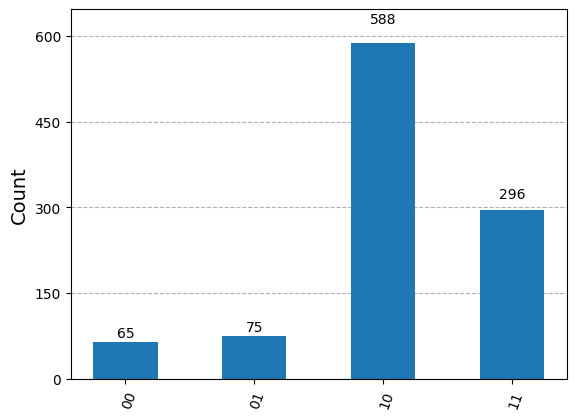

In [4]:
n = 2 # Number of estimation qubits
phi = 0.6 # Angle phi
result = PhaseEstimation(n, phi)

# Print the result
print(f'For {n}-qubits, phi = {int(max(result.get_counts(), key = result.get_counts().get), 2) / 2 ** n}.')
display(plot_histogram(result.get_counts()))

For 8-qubits, phi = 0.6015625.


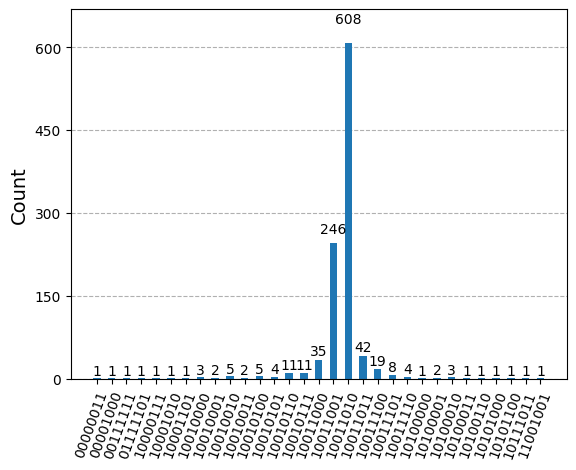

In [5]:
n = 8 # Number of estimation qubits
phi = 0.6 # Angle phi
result = PhaseEstimation(n, phi)

# Print the result
print(f'For {n}-qubits, phi = {int(max(result.get_counts(), key = result.get_counts().get), 2) / 2 ** n}.')
display(plot_histogram(result.get_counts()))